In [ ]:
# !pip install xlrd

In [ ]:
# pip install --no-index --find-links="xlrd-2.0.1-py2.py3-none-any.whl" xlrd

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import xlrd

In [12]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
# Sets the pandas dataframe options to display all columns/ rows.

In [8]:
data = pd.read_excel('../Data/WHR.xls')
regs = pd.read_excel('../Data/REG.xls')

In [13]:
data.head()

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
0,Afghanistan,2008,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906,0.286315,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2010,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318,0.275833,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2011,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,2012,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 'Life Ladder'                         生活階梯  
# 'Log GDP per capita'                  人均GDP的對數
# 'Social support'                      社會支持   
# 'Healthy life expectancy at birth'    出生時的健康預期壽命
# 'Freedom to make life choices'        生活選擇自由度
# 'Generosity'                          慷慨程度
# 'Perceptions of corruption'           腐敗感知程度 
# 'Positive affect'                     正面影響(幸福、歡笑和享受的平均水平)
# 'Negative affect'                     負面影響(擔心、悲傷和憤怒的平均水平)
# 'Confidence in national government'   對國家政府的信心
# 'Democratic Quality'                  民主品質(政府的民主程度)
# 'Delivery Quality'                    行政品質(政府的執行力)

In [14]:
data.columns

Index(['Country name', 'Year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-16',
       'gini of household income reported in Gallup, by wp5-year',
       'Most people can be trusted, Gallup',
       'Most people can be trusted, WVS round 1981-1984',
       'Most people can be trusted, WVS round 1989-1993',
       'Most people can be trusted, WVS round 1994-1998',
       'Most people can be trusted, WVS round 1999-2004',
       'Most people can be trusted, WVS round 2005-2009',
       'Most people can be trusted, WV

In [10]:
regs.head()

,Country name,Region
0,Finland,Western Europe
1,Denmark,Western Europe
2,Switzerland,Western Europe
3,Iceland,Western Europe
4,Netherlands,Western Europe


In [15]:
def find_region(country):
    if country in list(regs['Country name'].values):
        return regs[regs['Country name']==country].Region.values[-1]
    return 'None'

recents = data[data.Year == 2018]
recents = recents.dropna(axis=1, how="all")
recents = recents.fillna(recents.median())
recents['Region'] = recents['Country name'].apply(lambda x: find_region(x))

C:\Users\011305\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [16]:
recents.head()

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014",Region
10,Afghanistan,2018,2.694303,7.494588,0.507516,52.599998,0.373536,-0.084888,0.927606,0.424125,0.404904,0.364666,1.408344,0.522712,0.371000,0.290681,0.407623,0.282587,0.235000,0.230289,0.202638,0.185033,South Asia
21,Albania,2018,5.004403,9.412399,0.683592,68.699997,0.824212,0.005385,0.899129,0.713300,0.318997,0.435338,2.640531,0.527642,0.303250,0.456174,0.407623,0.282587,0.243243,0.232000,0.202638,0.185033,Central and Eastern Europe
28,Algeria,2018,5.043086,9.557952,0.798651,65.900002,0.583381,-0.172413,0.758704,0.591043,0.292946,0.468837,1.973943,0.391416,0.276000,0.667872,0.407623,0.282587,0.235000,0.107644,0.202638,0.179286,Middle East and North Africa
45,Argentina,2018,5.792797,9.809972,0.899912,68.800003,0.845895,-0.206937,0.855255,0.820310,0.320502,0.261352,2.472559,0.426833,0.460938,0.405356,0.270073,0.223553,0.170844,0.150154,0.174058,0.193531,Latin America and Caribbean
58,Armenia,2018,5.062449,9.119424,0.814449,66.900002,0.807644,-0.149109,0.676826,0.581488,0.454840,0.670828,2.102111,0.415236,0.319250,0.406403,0.407623,0.282587,0.235000,0.230289,0.202638,0.109136,Commonwealth of Independent States


Text(0.5, 0, 'Year')

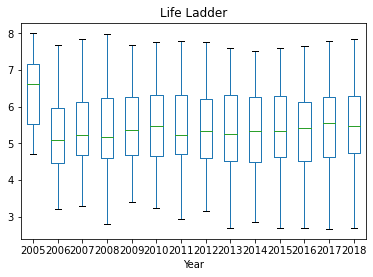

In [17]:
# # 2005年至2018年間 'Life Ladder'(生活階梯)的逐年變化(箱型圖)
# data[['Year', 'Life Ladder']].set_index('Year').boxplot(by='Year', grid=False)
# plt.suptitle("")
# plt.title('Life Ladder')
# plt.xlabel('Year')

Year
2005     27
2006     89
2007    102
2008    110
2009    114
2010    124
2011    146
2012    142
2013    137
2014    145
2015    143
2016    142
2017    147
2018    136
Name: Life Ladder, dtype: int64


Text(0, 0.5, 'Countries')

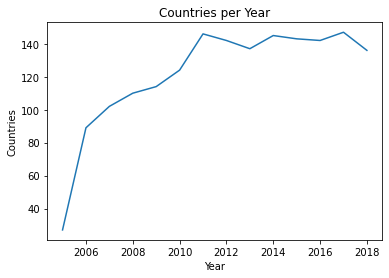

In [24]:
# 2005年至2018年間 每年接受調查的國家數量
print(data.groupby('Year')['Life Ladder'].count())
data.groupby('Year')['Life Ladder'].count().plot()
plt.title('Countries per Year')
plt.xlabel('Year')
plt.ylabel('Countries')

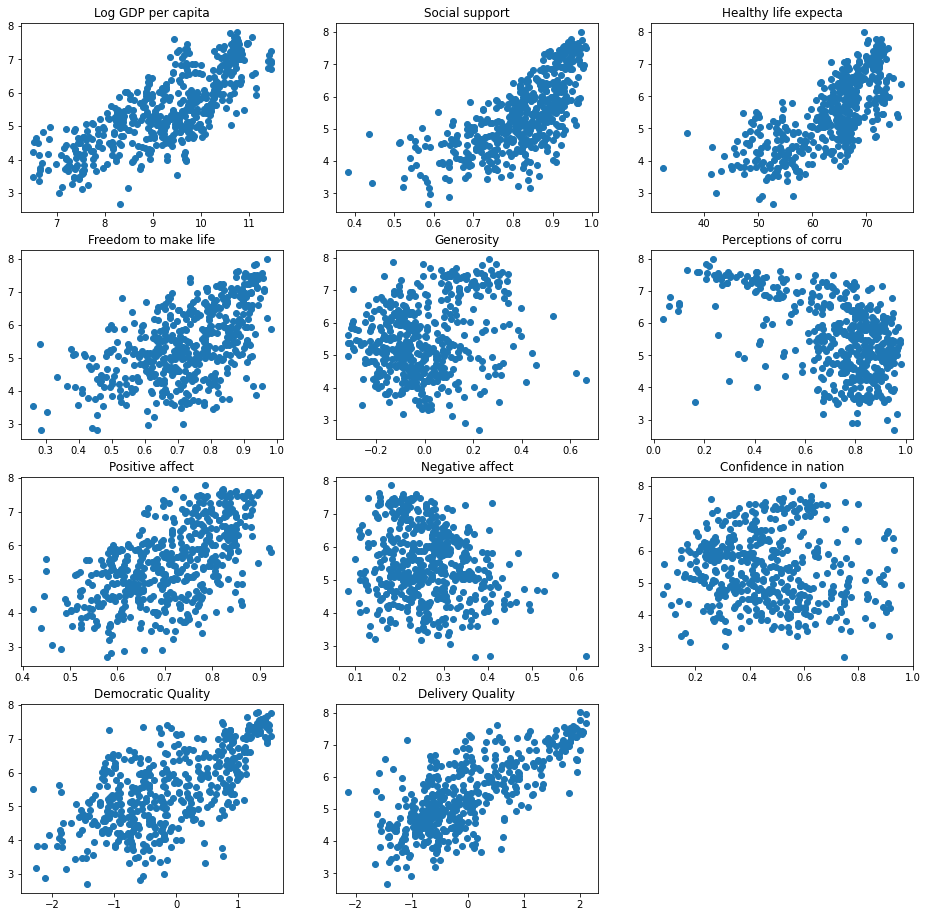

In [19]:
# 各種因素對'Life Ladder'(生活階梯)的散佈圖
def create_scatter(col, nc, nr, index):
    plt.subplot(nc, nr, index)
    render = data.sample(frac=0.3)
    plt.scatter(render[col], render['Life Ladder'])    
    plt.title(str(col)[:20])

i = 1
plt.figure(figsize = (16, 16))
for key in ['Log GDP per capita',
            'Social support', 
            'Healthy life expectancy at birth',
            'Freedom to make life choices', 
            'Generosity',
            'Perceptions of corruption',
            'Positive affect', 
            'Negative affect',
            'Confidence in national government', 
            'Democratic Quality',
            'Delivery Quality']:
    create_scatter(key, 4, 3, i)
    i += 1
plt.show()
    

In [20]:
# 各種因素對'Life Ladder'(生活階梯)的相關係數
def calculate_correlation(col):
    render = data.sample(frac=0.3)
    r = np.corrcoef(data[col], data['Life Ladder'])[0][1]
    print(col+" Life Ladder Correlation: ", r)

for key in ['Log GDP per capita',
            'Social support', 
            'Healthy life expectancy at birth',
            'Freedom to make life choices', 
            'Generosity',
            'Perceptions of corruption',
            'Positive affect', 
            'Negative affect',
            'Confidence in national government', 
            'Democratic Quality',
            'Delivery Quality']:
    calculate_correlation(key)

Log GDP per capita Life Ladder Correlation:  nan
Social support Life Ladder Correlation:  nan
Healthy life expectancy at birth Life Ladder Correlation:  nan
Freedom to make life choices Life Ladder Correlation:  nan
Generosity Life Ladder Correlation:  nan
Perceptions of corruption Life Ladder Correlation:  nan
Positive affect Life Ladder Correlation:  nan
Negative affect Life Ladder Correlation:  nan
Confidence in national government Life Ladder Correlation:  nan
Democratic Quality Life Ladder Correlation:  nan
Delivery Quality Life Ladder Correlation:  nan


In [22]:
# recents.groupby('Region')['Country name'].count().index

Index(['Central and Eastern Europe', 'Commonwealth of Independent States',
       'East Asia', 'Latin America and Caribbean',
       'Middle East and North Africa', 'None', 'North America and ANZ',
       'South Asia', 'Southeast Asia', 'Sub-Saharan Africa', 'Western Europe'],
      dtype='object', name='Region')

In [23]:
# recents.groupby('Region')['Country name'].count()

Region
Central and Eastern Europe            14
Commonwealth of Independent States    11
East Asia                              5
Latin America and Caribbean           18
Middle East and North Africa          14
None                                   1
North America and ANZ                  4
South Asia                             6
Southeast Asia                         9
Sub-Saharan Africa                    34
Western Europe                        20
Name: Country name, dtype: int64

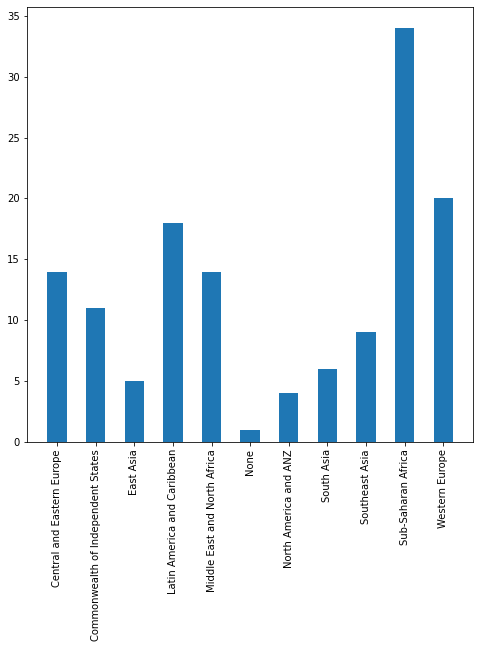

In [21]:
# 各區域的國家數比較
plt.figure(figsize = (8, 8))
plt.bar(recents.groupby('Region')['Country name'].count().index,
        recents.groupby('Region')['Country name'].count(),
        width=0.5, 
        bottom=None, 
        align='center')
plt.xticks(rotation='vertical')
plt.show()

<Figure size 576x576 with 0 Axes>

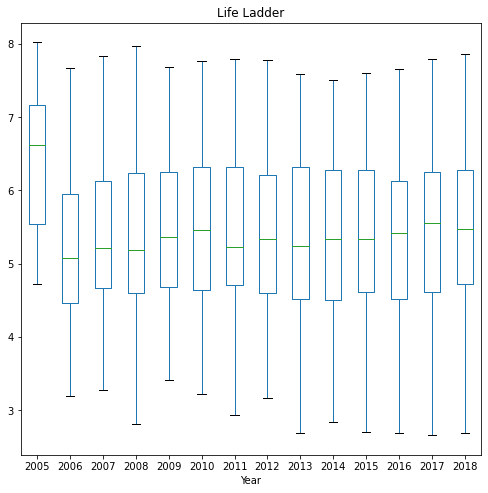

In [26]:
# 2005年至2018年間 'Life Ladder'(生活階梯)的逐年變化(箱型圖)
plt.figure(figsize = (8, 8))
data[['Year', 'Life Ladder']].set_index('Year').boxplot(by='Year', 
                                                        grid=False, 
                                                        figsize=(8, 8))
plt.suptitle("")
plt.title('Life Ladder')
plt.xlabel('Year')
plt.show()

In [27]:
print(data.groupby('Year')['Country name'].count())

Year
2005     27
2006     89
2007    102
2008    110
2009    114
2010    124
2011    146
2012    142
2013    137
2014    145
2015    143
2016    142
2017    147
2018    136
Name: Country name, dtype: int64


Text(0.5, 0, 'Year')

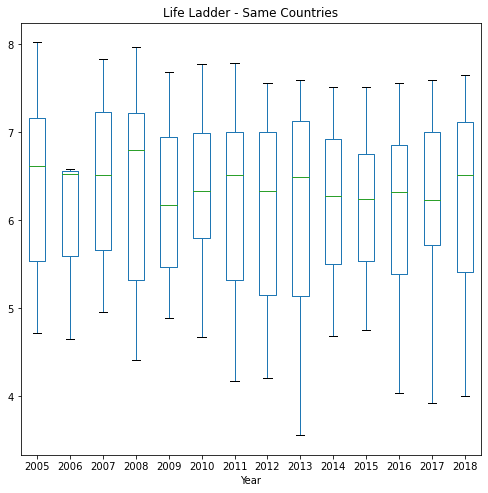

In [28]:
# 箱型圖只畫2005年有接受調查的27個國家
t = data[data['Year']==2005].copy()
countries = list(t['Country name'].values)
filtered = data[data['Country name'].isin(countries)]

filtered[['Year', 'Life Ladder']].set_index('Year').boxplot(by='Year', 
                                                            grid=False, 
                                                            figsize=(8, 8))
plt.suptitle("")
plt.title('Life Ladder - Same Countries')
plt.xlabel('Year')

In [ ]:
from sklearn.manifold import t_sne

t = t_sne.TSNE()
data = data.fillna(data.median())
transformed = t.fit_transform(data[['Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption','Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality']].values)
    
plt.scatter(transformed[:,0], transformed[:,1], c=data['Life Ladder'].values)

regions = {x: 0 for x in regs.Region.unique()}
i = 0
for r in regions:
    regions[r] = i
    i += 1
regions['None'] = i
    
plt.scatter(transformed[:,0], transformed[:,1], c=data['Region'].apply(lambda x: regions[x]).values)